# Color Masking, Green Screen

### Import all depedencies

In [2]:
# Import resources
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import numpy as np
import cv2

%matplotlib inline

### Read and display image

Image shape: (450, 660, 3)


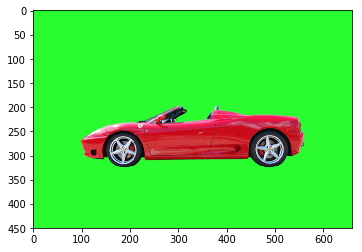

In [3]:
# Read in the image
image = mpimg.imread('images/green_background.jpg')

# Print out the image dimensions (height, width, and depth(color))
print('Image shape:', image.shape)

# Display the image
plt.imshow(image) 

### Define Color Threshold

In [4]:
# Define the color selection boundaries in RGB values
lower_green = np.array([0,180,0])
upper_green = np.array([100,255,100])

### Creating the Mask

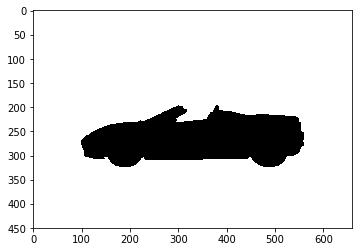

In [5]:
# Define the masked area
mask = cv2.inRange(image, lower_green, upper_green)

# Visualize the mask
plt.imshow(mask, cmap='gray')

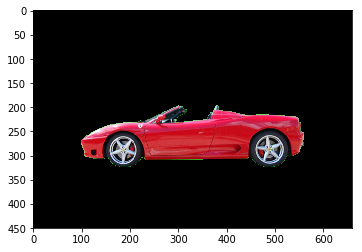

In [6]:
# Mas the image to let the car show through
masked_image = np.copy(image)

masked_image[mask != 0] = [0, 0, 0]

# Display
plt.imshow(masked_image)

### Mask and add background image

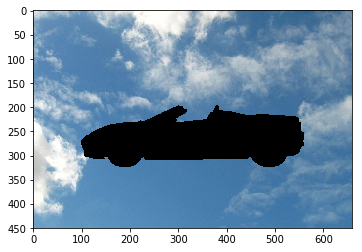

In [7]:
# Load in a background iage, and covert it to RGB
background_image = mpimg.imread('images/sky.jpg')

# Crop to match background (450x660)
row_crop = 63
col_crop = 182

image_cropped = background_image[row_crop-1: -row_crop, col_crop: -col_crop]

# Mask the background 
sky_masked = np.copy(image_cropped)
sky_masked[mask == 0] = [0,0,0]

# Display results
plt.imshow(sky_masked)

### Complete and display image

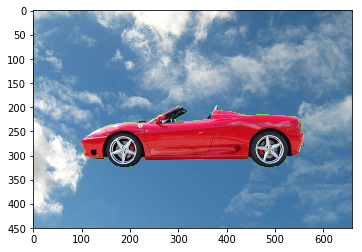

In [8]:
# Add two images together for complete image
result_image = masked_image + sky_masked
plt.imshow(result_image)